In [391]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [523]:
df = pd.read_csv('heart_disease_health_indicators.csv')

In [524]:
df.duplicated().sum()

23816

In [525]:
df.drop_duplicates()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.174725,1.182855,0.19871,1.764794,1.131699,-0.196986,-0.416683,-1.778993,-1.319422,...,0.227876,-0.301894,2.373563,2.021610,1.270122,2.279035,-0.880638,0.335578,-1.077762,-1.492522
1,0,-0.851263,-0.845412,-5.03246,-0.507712,1.131699,-0.196986,-0.416683,0.562116,-1.319422,...,-4.388354,3.312420,0.483863,-0.427363,-0.478943,-0.438782,-0.880638,-0.319291,0.958222,-2.462362
2,0,1.174725,1.182855,0.19871,-0.053211,-0.883627,-0.196986,-0.416683,-1.778993,0.757908,...,0.227876,3.312420,2.373563,3.654259,3.019186,2.279035,-0.880638,0.335578,-1.077762,0.932076
3,0,1.174725,-0.845412,0.19871,-0.204711,-0.883627,-0.196986,-0.416683,0.562116,0.757908,...,0.227876,-0.301894,-0.460988,-0.427363,-0.478943,-0.438782,-0.880638,0.990446,-2.095754,-0.037763
4,0,1.174725,1.182855,0.19871,-0.659212,-0.883627,-0.196986,-0.416683,0.562116,0.757908,...,0.227876,-0.301894,-0.460988,-0.019200,-0.478943,-0.438782,-0.880638,0.990446,-0.059770,-1.007602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246456,0,-0.851263,-0.845412,0.19871,-0.507712,-0.883627,-0.196986,-0.416683,0.562116,0.757908,...,0.227876,-0.301894,-1.405838,-0.427363,-0.478943,-0.438782,-0.880638,-1.301593,0.958222,0.932076
246457,0,-0.851263,1.182855,0.19871,-0.659212,-0.883627,-0.196986,-0.416683,-1.778993,-1.319422,...,0.227876,-0.301894,0.483863,-0.427363,-0.478943,-0.438782,-0.880638,-0.319291,-0.059770,-1.492522
246458,0,-0.851263,-0.845412,-5.03246,-0.204711,-0.883627,-0.196986,-0.416683,0.562116,-1.319422,...,0.227876,3.312420,-0.460988,-0.427363,-0.478943,-0.438782,-0.880638,-1.629027,0.958222,-0.522683
246459,0,-0.851263,1.182855,0.19871,1.310293,-0.883627,-0.196986,2.491373,-1.778993,-1.319422,...,0.227876,-0.301894,1.428713,-0.427363,-0.478943,-0.438782,-0.880638,-0.646725,-1.077762,-2.462362


In [526]:
scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

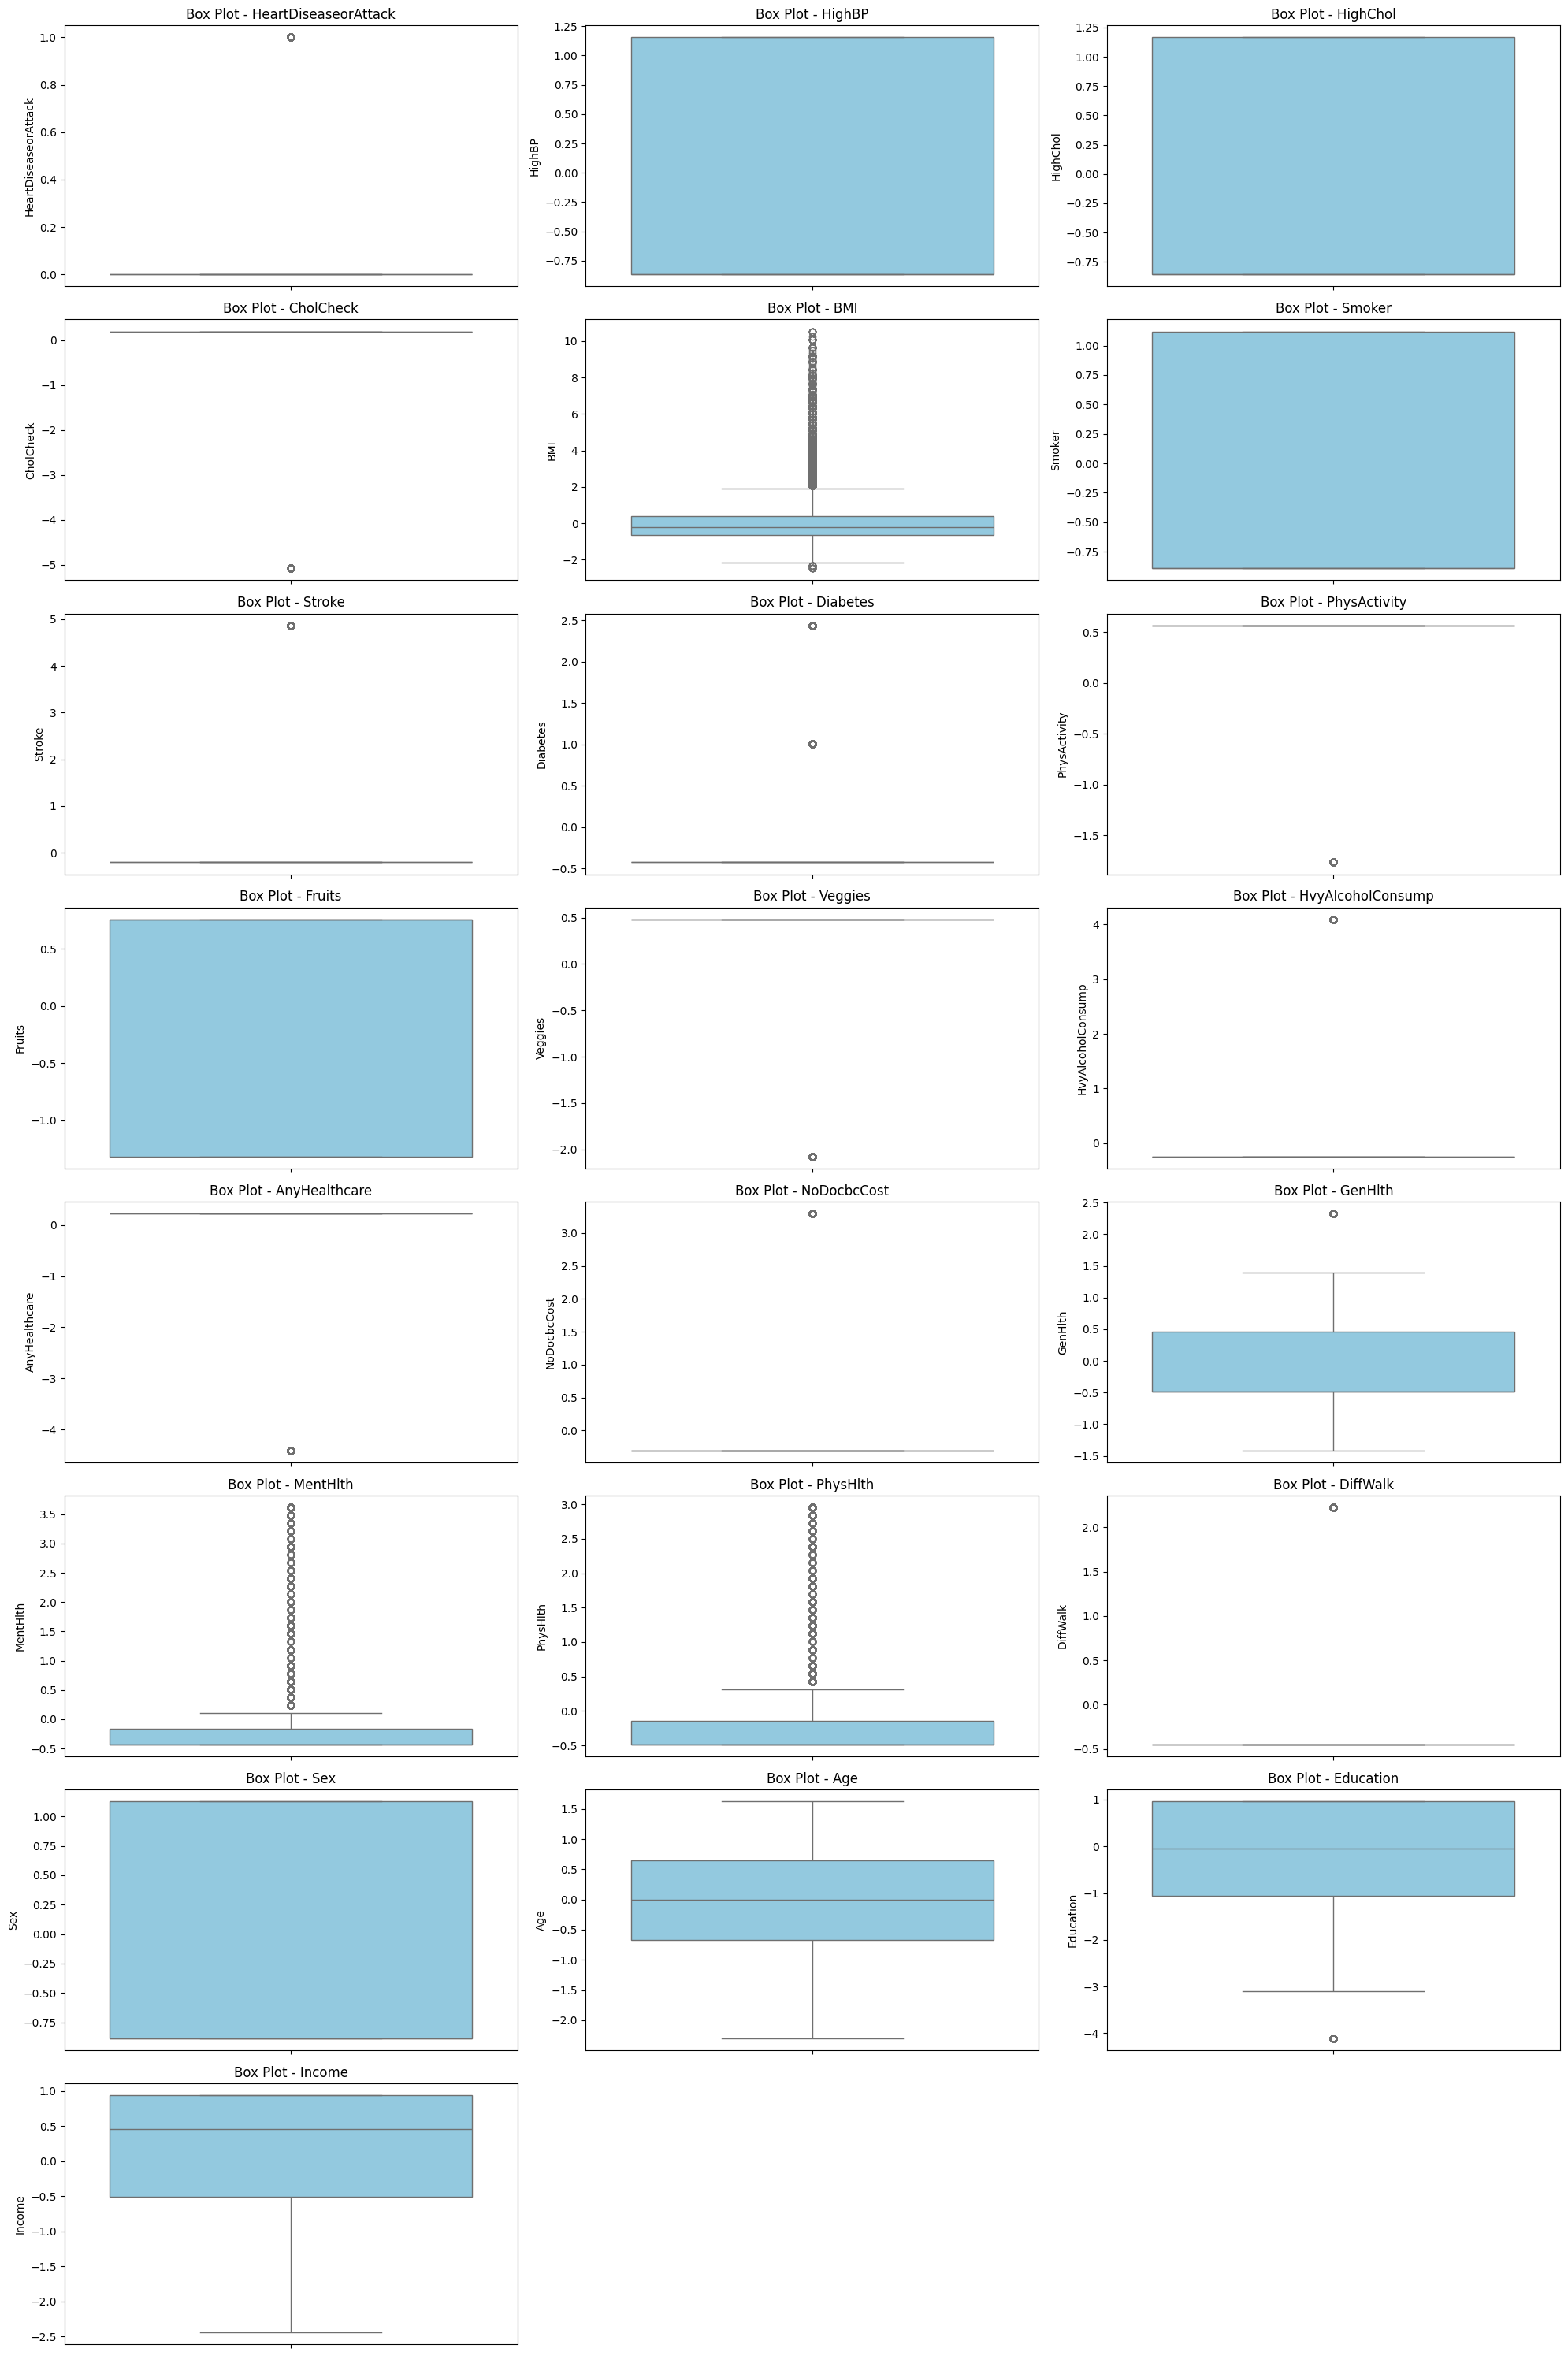

In [381]:
plt.figure(figsize=(20, 30))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)  
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Box Plot - {column}')
    plt.tight_layout()

plt.show()


In [527]:
bmi_upper = df['BMI'].quantile(0.75)
phys_upper = df['PhysHlth'].quantile(0.75)
ment_upper = df['MentHlth'].quantile(0.75)
genhealth_upper = df['GenHlth'].quantile(0.75)
education_lower = df['Education'].quantile(0.25)
bmi_lower = df['BMI'].quantile(0.25)
income_lower = df['Income'].quantile(0.25)

df_filtered = df[
    (df['BMI'] <= bmi_upper) & 
    (df['PhysHlth'] <= phys_upper) & 
    (df['MentHlth'] <= ment_upper) & 
    (df['GenHlth'] <= genhealth_upper) & 
    (df['Education'] >= education_lower) &
    (df['BMI'] >= bmi_lower) & 
    (df['Income'] <= income_lower) 
]

In [528]:
X = df_filtered.drop('HeartDiseaseorAttack', axis=1)
y = df_filtered['HeartDiseaseorAttack']


In [530]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [531]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  
    BatchNormalization(),

    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1, activation='sigmoid') 
])

In [532]:
def lr_schedule(epoch, lr):
    if epoch < 5:  
        return lr 
    elif epoch % 5 == 0:  
        return lr * 0.9  
    else:  
        return lr

lr_scheduler = LearningRateScheduler(lr_schedule)


In [533]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [534]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=256,
    callbacks=[lr_scheduler]
)

Epoch 1/50
51/51 [==============================] - 4s 23ms/step - loss: 0.3558 - accuracy: 0.8738 - val_loss: 0.2296 - val_accuracy: 0.9297 - lr: 0.0100
Epoch 2/50
51/51 [==============================] - 1s 12ms/step - loss: 0.2139 - accuracy: 0.9349 - val_loss: 0.2155 - val_accuracy: 0.9297 - lr: 0.0100
Epoch 3/50
51/51 [==============================] - 1s 10ms/step - loss: 0.2067 - accuracy: 0.9360 - val_loss: 0.2166 - val_accuracy: 0.9297 - lr: 0.0100
Epoch 4/50
51/51 [==============================] - 0s 9ms/step - loss: 0.2055 - accuracy: 0.9356 - val_loss: 0.2154 - val_accuracy: 0.9297 - lr: 0.0100
Epoch 5/50
51/51 [==============================] - 0s 10ms/step - loss: 0.2024 - accuracy: 0.9356 - val_loss: 0.2162 - val_accuracy: 0.9297 - lr: 0.0100
Epoch 6/50
51/51 [==============================] - 1s 11ms/step - loss: 0.2035 - accuracy: 0.9365 - val_loss: 0.2135 - val_accuracy: 0.9297 - lr: 0.0090
Epoch 7/50
51/51 [==============================] - 1s 11ms/step - loss: 0.20

In [535]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

114/114 [==============================] - 1s 5ms/step - loss: 0.2200 - accuracy: 0.9341
Test Accuracy: 93.41%


In [536]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

114/114 [==============================] - 1s 4ms/step


In [537]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[3384    1]
 [ 238    1]]


In [538]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      3385
           1       0.50      0.00      0.01       239

    accuracy                           0.93      3624
   macro avg       0.72      0.50      0.49      3624
weighted avg       0.91      0.93      0.90      3624



114/114 [==============================] - 0s 4ms/step


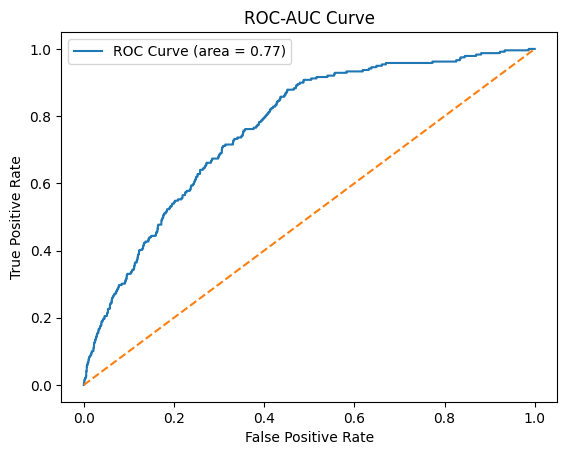

In [539]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

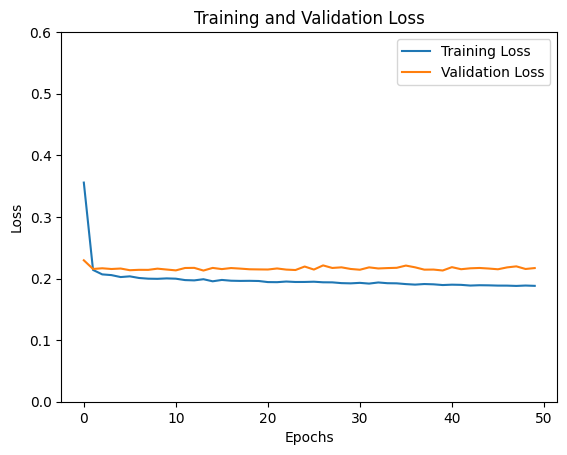

In [542]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim([0,0.6])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


 Bonus: Hyperparameter Tuning with Keras Tuner

In [545]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        activation='relu', input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='my_tuning_dir', project_name='heart_disease_tuning'
)

tuner.search(X_train, y_train, validation_split=0.2, epochs=10)
best_model = tuner.get_best_models(num_models=1)[0]


Trial 4 Complete [00h 00m 26s]
val_accuracy: 0.9299758672714233

Best val_accuracy So Far: 0.9299758672714233
Total elapsed time: 00h 01m 40s


Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.2036 - accuracy: 0.9371 - val_loss: 0.2128 - val_accuracy: 0.9300
Epoch 2/20
363/363 [==============================] - 2s 7ms/step - loss: 0.2018 - accuracy: 0.9374 - val_loss: 0.2117 - val_accuracy: 0.9300
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.2002 - accuracy: 0.9370 - val_loss: 0.2122 - val_accuracy: 0.9300
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.1978 - accuracy: 0.9372 - val_loss: 0.2124 - val_accuracy: 0.9289
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.1967 - accuracy: 0.9373 - val_loss: 0.2161 - val_accuracy: 0.9300
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.1955 - accuracy: 0.9377 - val_loss: 0.2140 - val_accuracy: 0.9286
Epoch 7/20
363/363 [==============================] - 3s 7ms/step - loss: 0.1959 - accuracy: 0.9370 - val_loss: 0.2139 - val_accuracy: 0.9300
Epoch 

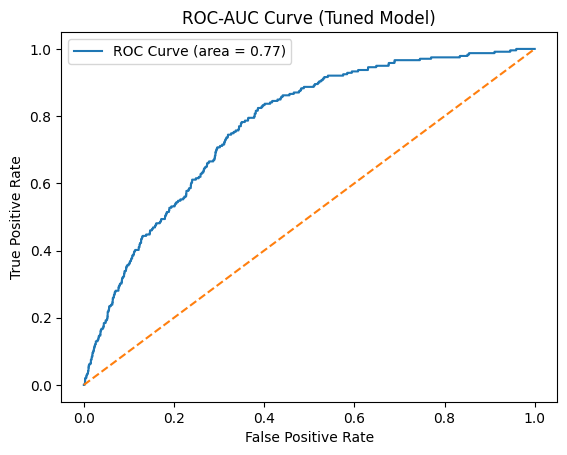

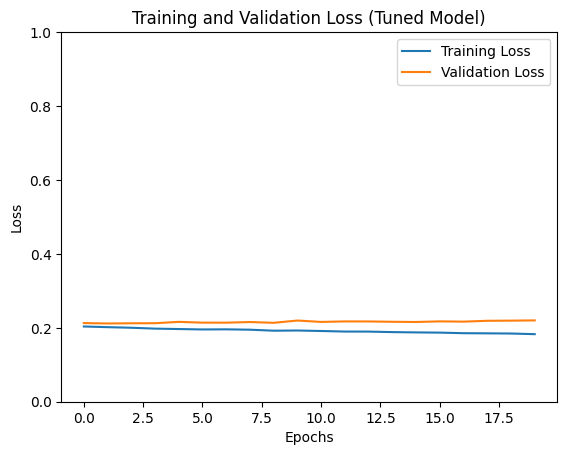

In [546]:
history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy (Tuned Model): {test_accuracy * 100:.2f}%')

y_pred = (best_model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

print('Classification Report:\n', classification_report(y_test, y_pred))

y_pred_proba = best_model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (Tuned Model)')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Tuned Model)')
plt.legend()
plt.show()
